# 1. Introduction

The goal of this project is to analyze a dataset containing information on vehicles auctioned through a company that is a global leader in online vehicle auctions. The data includes a variety of attributes related to each vehicle, such as its lot number, assignment date, and sale date, yard zip code, make and model, pre-loss value, repair estimate, damage types, severity of damage, run condition, title group, odometer readings, and sale price.

The objective of this analysis is to uncover insights and patterns within the data that could help improve the company's auction efficiency and sales performance. This includes identifying relationships between various attributes and the final sale price of the vehicles, understanding how different factors such as damage severity and repair estimates affect sale prices, and exploring how the timing of events (e.g., assignment date and sale date) impacts the sale process.

Through this analysis, potential solutions and strategies can be proposed to optimize the company's operations and enhance sales outcomes. This includes identifying areas for improvement in inventory management, auction timing, vehicle preparation, and more. By examining the data in depth, the project aims to provide actionable insights to support Copart's ongoing success in the vehicle auction market.

# 2. Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv
df = pd.read_csv('Data_Analyst_Intern_Problem.csv')

In [3]:
# view data
df.head()

,Lot Number,Yard Zip Code,Assignment Date,Loss Date,Invoice Date,Vehicle Type,Lot Year,Make,Group Model,Lot Model,...,Loss Type,Primary Damage Type,Secondary Damage Type,Severity of Damage,Run Condition,Title Group,Odometer,Odometer Brand,Has Keys,Sale Price
0,26891434,87105,20200110,20200108,20200227,V,2012,HOND,NaN,CIVIC LX,...,C,FR,,1,D,S,0,N,Y,1700.0
1,60309846,85043,20230920,20220913,20221003,V,2005,NISS,NaN,ALTIMA S,...,P,RR,FR,2,D,S,75583,A,Y,1.0
2,57623533,85043,20191122,20191122,20200203,V,2006,ACUR,TSX,TSX,...,NaN,FR,UN,2,S,S,141147,A,Y,800.0
3,46910394,85043,20200819,20200817,20200922,V,2013,NISS,VERSA,VERSA S,...,C,FR,,2,D,S,98347,A,Y,2000.0
4,43189105,85706,20210510,20210510,20210625,V,2004,DODG,RAM 1500,RAM 1500 S,...,NaN,FR,RR,1,D,S,186776,A,Y,2200.0


In [4]:
# number of rows and columns in the dataset
df.shape

(226013, 22)

In [5]:
# all columns
df.columns

Index(['Lot Number', 'Yard Zip Code', 'Assignment Date', 'Loss Date',
       'Invoice Date', 'Vehicle Type', 'Lot Year', 'Make', 'Group Model',
       'Lot Model', 'ACV', 'Repair Est.', 'Loss Type', 'Primary Damage Type',
       'Secondary Damage Type', 'Severity of Damage', 'Run Condition',
       'Title Group', 'Odometer', 'Odometer Brand', 'Has Keys', 'Sale Price'],
      dtype='object')

In [6]:
# percentage of missing values for each column
# missing percentage: Loss Type = 54%, Group Model = 18%, Vehicle Type = 5
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False)

Loss Type                54.11
Group Model              18.46
Vehicle Type              4.56
Lot Number                0.00
Has Keys                  0.00
Odometer Brand            0.00
Odometer                  0.00
Title Group               0.00
Run Condition             0.00
Severity of Damage        0.00
Secondary Damage Type     0.00
Primary Damage Type       0.00
Repair Est.               0.00
Yard Zip Code             0.00
ACV                       0.00
Lot Model                 0.00
Make                      0.00
Lot Year                  0.00
Invoice Date              0.00
Loss Date                 0.00
Assignment Date           0.00
Sale Price                0.00
dtype: float64

## 2.1 Drop Rows and Columns

In [7]:
# number of values duplicated
len(df[df['Lot Number'].duplicated()])

20545

In [8]:
# drop duplicates
df.drop_duplicates(subset='Lot Number', inplace=True)

In [9]:
# duplicates
duplicated_lot_numbers = df.loc[df['Lot Number'].duplicated(), 'Lot Number']

# Filter rows where the lot number is in duplicated_lot_numbers
result = df.loc[df['Lot Number'].isin(duplicated_lot_numbers)]
result_sorted = result.sort_values(by='Lot Number')

result_sorted.to_csv('output.csv',index=False)

In [10]:
# drop Loss Type column as it has too 54% missing values
# use Primary Damage Type and Secondary Damage Type for analysis instead
df.drop(columns=['Loss Type'],inplace=True)

In [11]:
# count of rows with loss date = 0
# only 0.05%
round(len(df[df['Loss Date']==0])*100/len(df),2)

0.05

In [12]:
# remove rows with loss date = 0
df = df[df['Loss Date']!=0]

## 2.2 Transform Data

In [13]:
# columns has blank spaces at the end of each value
df['Make'].unique()

array(['HOND ', 'NISS ', 'ACUR ', 'DODG ', 'CHEV ', 'FORD ', 'CADI ',
       'OLDS ', 'BMW  ', 'INFI ', 'RAM  ', 'HYUN ', 'TOYT ', 'LINC ',
       'SUBA ', 'CHRY ', 'LEXS ', 'GMC  ', 'MAZD ', 'VOLK ', 'KIA  ',
       'MITS ', 'PONT ', 'JEP  ', 'YAMA ', 'VOLV ', 'HARL ', 'KAWA ',
       'BUIC ', 'SATU ', 'OTHE ', 'MIN  ', 'MERZ ', 'AUDI ', 'FIAT ',
       'MERC ', 'SPCO ', 'PORS ', 'GEO  ', 'JAGU ', 'GRET ', 'LAND ',
       'POLS ', 'HAUL ', 'SCIO ', 'KW   ', 'POLA ', 'ISU  ', 'VCTY ',
       'TIFF ', 'SAA  ', 'DEER ', 'SUZI ', 'CFMO ', 'ALFA ', 'FRHT ',
       'ELIM ', 'ALOY ', 'MG   ', 'INTL ', 'KUBO ', 'VIPP ', 'TESL ',
       'TEXS ', 'KTM  ', 'TERY ', 'HINO ', 'PTRB ', 'OTHR ', 'COAC ',
       'CANA ', 'UTIL ', 'PLYM ', 'HEAR ', 'HUMM ', 'PACE ', 'LOTU ',
       'SMRT ', 'WINN ', 'CLUB ', 'DUCA ', 'CUSH ', 'ZONE ', 'KEND ',
       'HILO ', 'MACK ', 'GENS ', 'ROCK ', 'GREA ', 'STAR ', 'JYCO ',
       'WKED ', '0', 'FORE ', 'CISC ', 'SEAD ', 'DATS ', 'PJTM ', 'SKYL ',
       'KEYS ',

In [14]:
# strip blank spaces in the column
df['Make'] = df['Make'].str.strip()

In [15]:
# check data types of columns
df.dtypes

Lot Number                 int64
Yard Zip Code              int64
Assignment Date            int64
Loss Date                  int64
Invoice Date               int64
Vehicle Type              object
Lot Year                   int64
Make                      object
Group Model               object
Lot Model                 object
ACV                      float64
Repair Est.              float64
Primary Damage Type       object
Secondary Damage Type     object
Severity of Damage         int64
Run Condition             object
Title Group               object
Odometer                   int64
Odometer Brand            object
Has Keys                  object
Sale Price               float64
dtype: object

In [16]:
# transform date columns from int type to date type
df['Assignment Date'] = pd.to_datetime(df['Assignment Date'], format='%Y%m%d')
df['Loss Date'] = pd.to_datetime(df['Loss Date'], format='%Y%m%d')
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%Y%m%d', errors='coerce')

In [17]:
# transorm lot year to three categories: <1980, between 1980 and 2010, and >2010
bins = [float('-inf'), 1980, 2010, float('inf')]
labels = ['<1980', '1980-2010', '>2010']

df['Year Category'] = pd.cut(df['Lot Year'], bins=bins, labels=labels, right=False)
print(df[['Lot Year', 'Year Category']])

        Lot Year Year Category
0           2012         >2010
1           2005     1980-2010
2           2006     1980-2010
3           2013         >2010
4           2004     1980-2010
...          ...           ...
226008      2008     1980-2010
226009      2006     1980-2010
226010      2014         >2010
226011      2012         >2010
226012      2020         >2010

[205367 rows x 2 columns]


In [18]:
# correct data type of columns
df['Lot Number'] = df['Lot Number'].astype(object)
df['Yard Zip Code'] = df['Yard Zip Code'].astype(object)
df['Lot Year'] = df['Lot Year'].astype(object)
df['Severity of Damage'] = df['Severity of Damage'].astype(object)
df['Year Category'] = df['Year Category'].astype(object)

In [19]:
# create new columns showing difference in dates
df['Loss Assignment Day Diff'] = (df['Assignment Date']-df['Loss Date']).dt.days
df['Assignment Invoice Day Diff'] = (df['Invoice Date']-df['Assignment Date']).dt.days

In [20]:
# only include lots with sale price less than ACV
df = df[df['Sale Price'] < df['ACV']]

## 2.3 Remove Outliers

NOTE: For most of the further analysis, I'll use subset of the dataset which includes vehicle type V only. The reason is that the total number of lots and total sale price is highest for vehicle type V. About 88.3% of the company's total sale price comes from vehicle type V. More information available in section 3.1.

In [21]:
# focusing on the majority vehicle type V for analysis
df_typev = df[df['Vehicle Type']=='V']
df_typev.describe()

,ACV,Repair Est.,Odometer,Sale Price,Loss Assignment Day Diff,Assignment Invoice Day Diff
count,180832.000000,1.808320e+05,1.808320e+05,180832.000000,180832.000000,180832.000000
mean,12156.786179,9.852709e+03,9.652488e+04,3280.382494,33.892165,59.526876
std,10264.367640,1.086704e+04,7.412396e+04,4268.868579,101.249015,104.407564
min,100.000000,0.000000e+00,0.000000e+00,0.000000,-62.000000,-359.000000
25%,5558.825000,4.500000e+03,4.091975e+04,925.000000,3.000000,28.000000
50%,9425.000000,8.253000e+03,9.183400e+04,2000.000000,9.000000,46.000000
75%,15497.535000,1.340186e+04,1.425820e+05,4000.000000,24.000000,74.000000
max,579155.000000,1.979513e+06,4.479550e+06,307000.000000,11082.000000,2026.000000


### 2.3.1 Remove Outliers for Sale Price

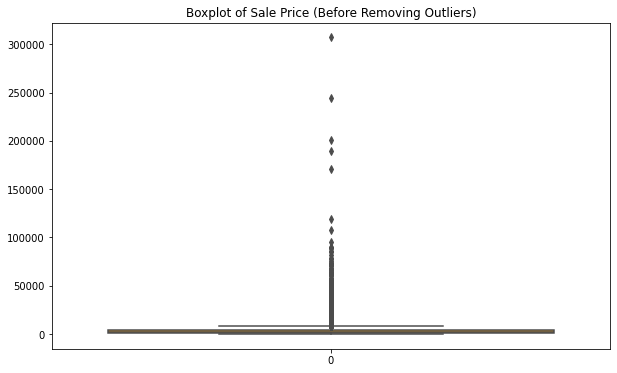

In [22]:
# Boplot - Sale Price (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Sale Price'], color='orange')
plt.title('Boxplot of Sale Price (Before Removing Outliers)')
plt.show()

In [23]:
# remove outlier using IQR method
Q1 = df_typev['Sale Price'].quantile(0.25)
Q3 = df_typev['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# use for seperate analysis
df_price_outlier = df_typev[df_typev['Sale Price'] > upper_bound]
df_typev = df_typev[(df_typev['Sale Price'] > lower_bound) & (df_typev['Sale Price'] < upper_bound)]

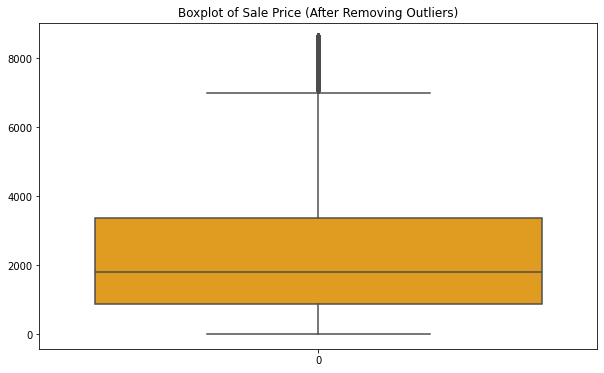

In [24]:
# Boxplot - Sale Price (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Sale Price'], color='orange')
plt.title('Boxplot of Sale Price (After Removing Outliers)')
plt.show()

### 2.3.2 Remove Outliers for Loss Assignment Day Diff

In [25]:
# count of negative values in Loss Assignment Day Diff
len(df_typev.loc[df_typev['Loss Assignment Day Diff'] < 0, 'Loss Assignment Day Diff'])

4

In [26]:
# count of negative values in Assignment Invoice Day Diff
len(df_typev.loc[df_typev['Assignment Invoice Day Diff'] < 0, 'Assignment Invoice Day Diff'])

5259

In [27]:
# impute negative values with zero (best estimate)
df_typev.loc[df_typev['Loss Assignment Day Diff'] < 0, 'Loss Assignment Day Diff'] = 0
df_typev.loc[df_typev['Assignment Invoice Day Diff'] < 0, 'Assignment Invoice Day Diff'] = 0

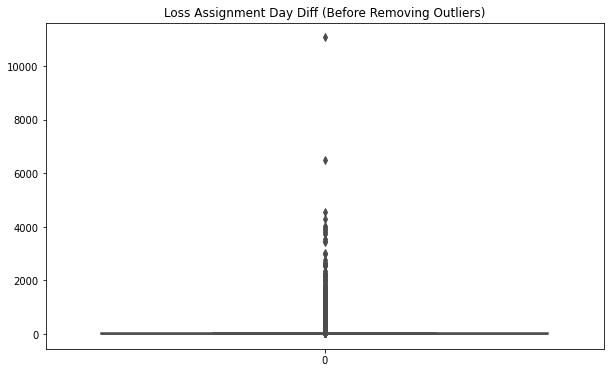

In [28]:
# Boxplot - Loss Assignment Day Diff (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Loss Assignment Day Diff'], color='orange')
plt.title('Loss Assignment Day Diff (Before Removing Outliers)')
plt.show()

In [29]:
# remove outlier using IQR method
Q1 = df_typev['Loss Assignment Day Diff'].quantile(0.25)
Q3 = df_typev['Loss Assignment Day Diff'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_typev = df_typev[(df_typev['Loss Assignment Day Diff'] > lower_bound) & (df_typev['Loss Assignment Day Diff'] < upper_bound)]

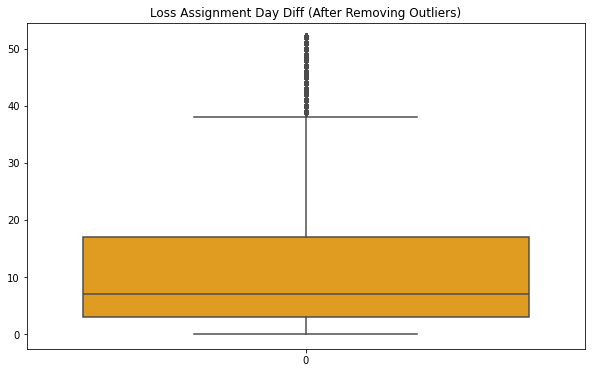

In [30]:
# Boxplot - Loss Assignment Day Diff (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Loss Assignment Day Diff'], color='orange')
plt.title('Loss Assignment Day Diff (After Removing Outliers)')
plt.show()

### 2.3.3 Remove Outliers for Assignment Invoice Day Diff

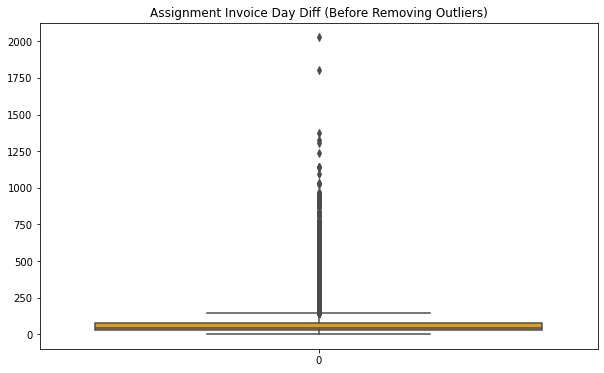

In [31]:
# Boxplot - Assignment Invoice Day Diff (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Assignment Invoice Day Diff'], color='orange')
plt.title('Assignment Invoice Day Diff (Before Removing Outliers)')
plt.show()

In [32]:
# remove outlier using IQR method
Q1 = df_typev['Assignment Invoice Day Diff'].quantile(0.25)
Q3 = df_typev['Assignment Invoice Day Diff'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_typev = df_typev[(df_typev['Assignment Invoice Day Diff'] > lower_bound) & (df_typev['Assignment Invoice Day Diff'] < upper_bound)]

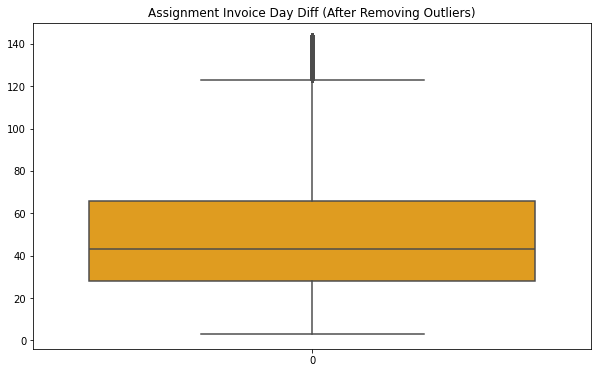

In [33]:
# Boxplot - Assignment Invoice Day Diff (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Assignment Invoice Day Diff'], color='orange')
plt.title('Assignment Invoice Day Diff (After Removing Outliers)')
plt.show()

### 2.3.4 Remove Outliers for Odometer

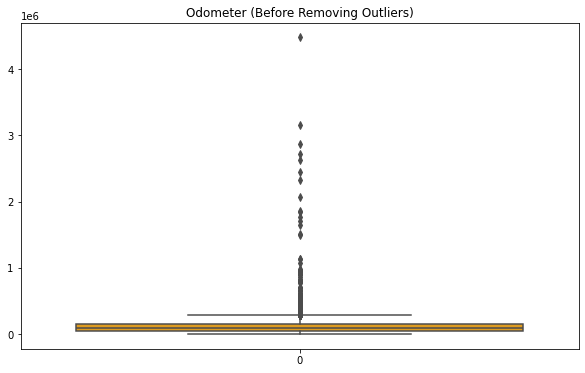

In [34]:
# Boxplot - Odometer (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Odometer'], color='orange')
plt.title('Odometer (Before Removing Outliers)')
plt.show()

In [35]:
# remove outlier using IQR method
Q1 = df_typev['Odometer'].quantile(0.25)
Q3 = df_typev['Odometer'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_typev = df_typev[(df_typev['Odometer'] > lower_bound) & (df_typev['Odometer'] < upper_bound)]

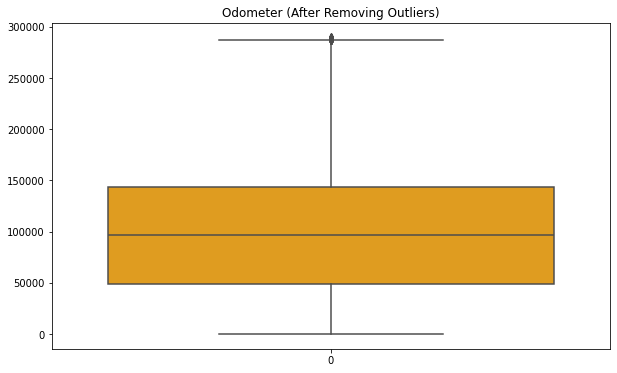

In [36]:
# Boxplot - Odometer (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Odometer'], color='orange')
plt.title('Odometer (After Removing Outliers)')
plt.show()

### 2.3.5 Remove Outliers for ACV

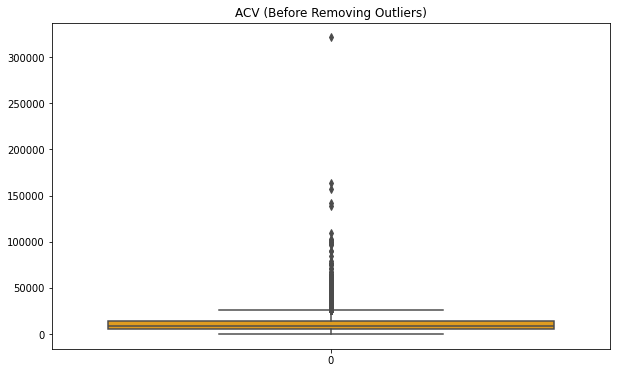

In [37]:
# Boxplot - ACV (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['ACV'], color='orange')
plt.title('ACV (Before Removing Outliers)')
plt.show()

In [38]:
# remove outlier using IQR method
Q1 = df_typev['ACV'].quantile(0.25)
Q3 = df_typev['ACV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_typev = df_typev[(df_typev['ACV'] > lower_bound) & (df_typev['ACV'] < upper_bound)]

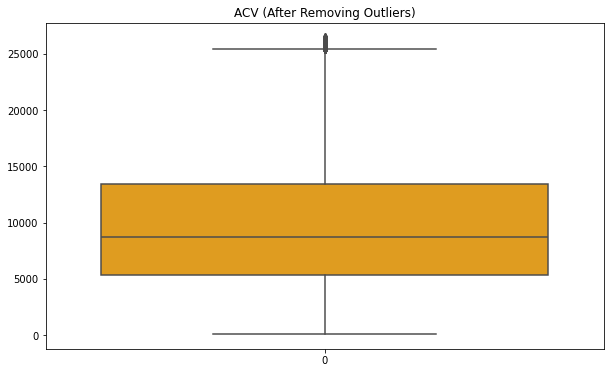

In [39]:
# Boxplot - ACV (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['ACV'], color='orange')
plt.title('ACV (After Removing Outliers)')
plt.show()

### 2.3.6 Remove Outliers for Repair Est.

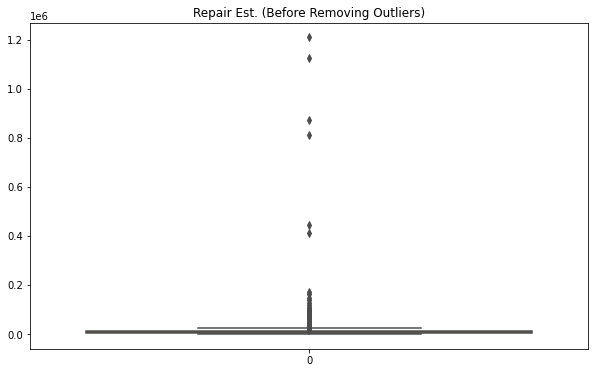

In [40]:
# Boxplot - Repair Est. (Before Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Repair Est.'], color='orange')
plt.title('Repair Est. (Before Removing Outliers)')
plt.show()

In [41]:
# remove outlier using IQR method
Q1 = df_typev['Repair Est.'].quantile(0.25)
Q3 = df_typev['Repair Est.'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_typev = df_typev[(df_typev['Repair Est.'] > lower_bound) & (df_typev['Repair Est.'] < upper_bound)]

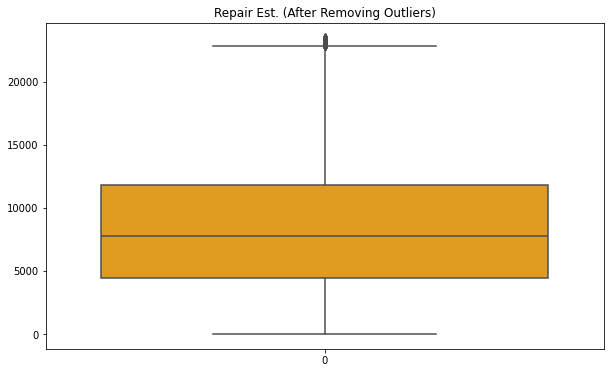

In [42]:
# Boxplot - Repair Est. (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_typev['Repair Est.'], color='orange')
plt.title('Repair Est. (After Removing Outliers)')
plt.show()

In [43]:
# number of rows and columns after removing outliers
df_typev.shape

(129457, 24)

In [44]:
# basic statistics of continuous variables after removing outliers
df_typev.describe()

,ACV,Repair Est.,Odometer,Sale Price,Loss Assignment Day Diff,Assignment Invoice Day Diff
count,129457.000000,129457.000000,129457.000000,129457.000000,129457.000000,129457.000000
mean,9686.963525,8243.023554,101091.180840,2351.814772,11.591594,49.670184
std,5486.252715,5507.680100,65374.845758,1858.524630,11.756028,29.031794
min,100.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5319.000000,4425.860000,53463.000000,925.000000,3.000000,27.000000
50%,8601.870000,7771.440000,99614.000000,1800.000000,7.000000,43.000000
75%,13132.000000,11798.660000,146044.000000,3250.000000,17.000000,66.000000
max,26459.000000,23518.970000,289527.000000,8600.000000,52.000000,143.000000


# 3. Data Exploration

## 3.1 Distributions By Vehicle Type

The total number of lots and total sale price is the highest for vehicle type V. About 88.3% of the company's total sale price comes from vehicle type V. So, I'll be focusing on V data type for most of my analysis.

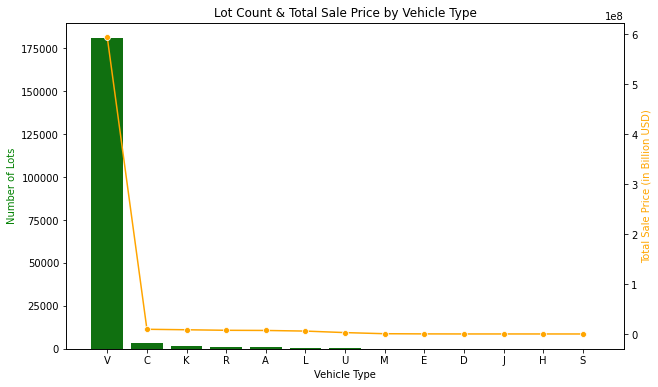

In [45]:
# Dual Axis Bar Chart - Lot Count & Total Sale Price by Vehicle Type
vehicle_counts = df['Vehicle Type'].value_counts().sort_values(ascending=False)
sum_of_sale_price = df.groupby('Vehicle Type')['Sale Price'].sum().sort_values(ascending=False)


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, ax=ax1, color='green')
ax1.set_ylabel('Number of Lots', color='green')
ax1.set_xlabel('Vehicle Type')

ax2 = ax1.twinx()
sns.lineplot(x=sum_of_sale_price.index, y=sum_of_sale_price.values, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Total Sale Price (in Billion USD)', color='orange')


plt.title('Lot Count & Total Sale Price by Vehicle Type')
plt.show()

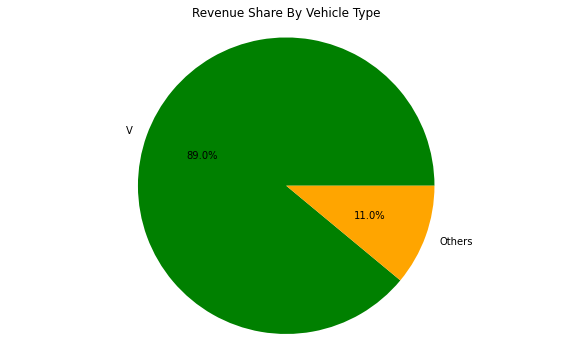

In [46]:
# Pie Chart Revenue Share By Vehicle Type
# categorize vehicle type into V and Others
df_vtype_pie = df.copy()
df_vtype_pie.loc[df_vtype_pie['Vehicle Type']!='V','Vehicle Type'] = 'Others'
sum_of_sale_price = df_vtype_pie.groupby('Vehicle Type')['Sale Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(sum_of_sale_price, labels=sum_of_sale_price.index, autopct='%1.1f%%', colors=['green','orange'])

plt.title('Revenue Share By Vehicle Type')
plt.axis('equal')
plt.show()

## 3.2 Histogram of Days Taken to be Assigned the Lot

In most cases, the lot was assigned to the company by insurance companies within one week.

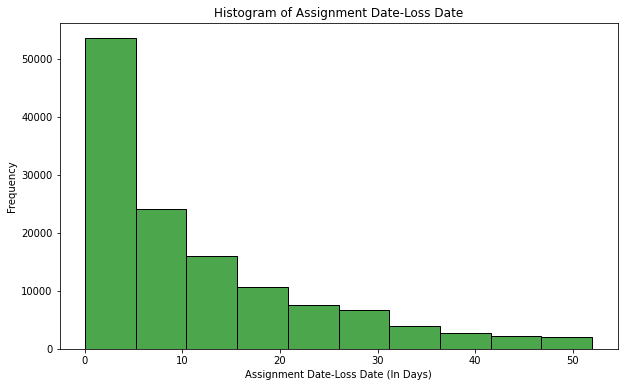

In [47]:
# Histogram - Assignment Date-Loss Date
plt.figure(figsize=(10, 6))
sns.histplot(data=df_typev, x='Loss Assignment Day Diff', bins=10, color='green', kde=False, alpha=0.7, edgecolor='black')
plt.xlabel('Assignment Date-Loss Date (In Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Assignment Date-Loss Date')
plt.show()

## 3.3 Histogram of Days Taken to Auction the Lot

The distribution is right skewed and normal. Most lots were auctioned by the company within two months of receiving them from the insurance company.

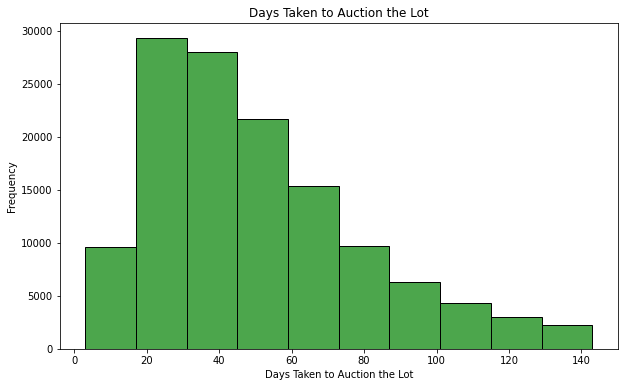

In [48]:
# Histogram - Invoice Date-Assignment Date
plt.figure(figsize=(10, 6))
sns.histplot(data=df_typev, x='Assignment Invoice Day Diff', bins=10, color='green', kde=False, alpha=0.7, edgecolor='black')
plt.xlabel('Days Taken to Auction the Lot')
plt.ylabel('Frequency')
plt.title('Days Taken to Auction the Lot')
plt.show()

## 3.4 Histogram of Lot Sale Price

Most of the lots were auctioned under 3000 USD.

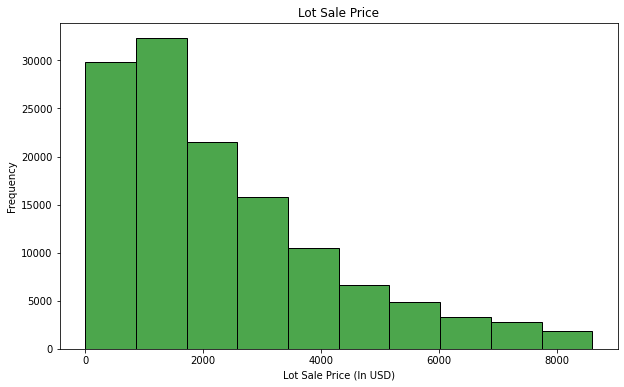

In [49]:
# Histogram - Lot Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(data=df_typev, x='Sale Price', bins=10, color='green', kde=False, alpha=0.7, edgecolor='black')
plt.xlabel('Lot Sale Price (In USD)')
plt.ylabel('Frequency')
plt.title('Lot Sale Price')
plt.show()

## 3.5 Total Number of Lots Auctioned for Each Primary Damage Type

Front End (FR) damage is the most common primary damage. Followed by Rear End (RR) and Side (SD) damage.

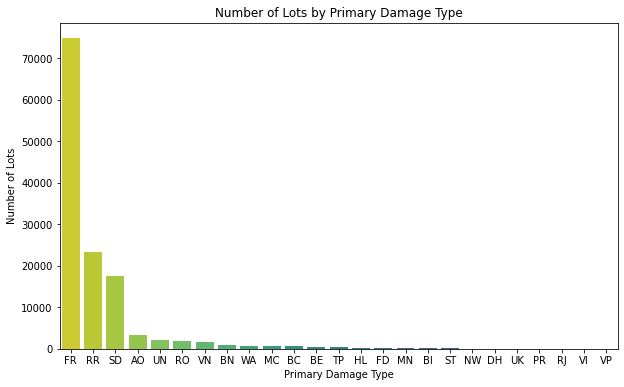

In [50]:
# Bar Chart - Number of Lots by Primary Damage Types
damage_counts = df_typev['Primary Damage Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=damage_counts.index, y=damage_counts.values, palette='viridis_r')
plt.xlabel('Primary Damage Type')
plt.ylabel('Number of Lots')
plt.title('Number of Lots by Primary Damage Type')
plt.show()

## 3.6 Mean Lot Sale Price By Lot Year Category

<1980 lots sell for higher price compare 1980-2010 lots. This is because of the additional value that an antique or classic car brings to the table.

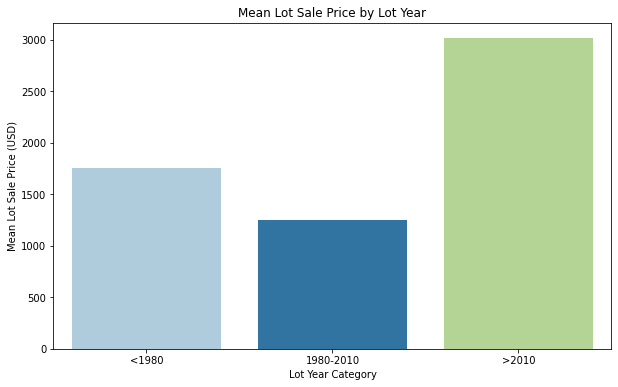

In [51]:
# Bar Chart - Mean Lot Sale Price by Lot Year Category
grouped_data = df_typev.groupby('Year Category')['Sale Price'].mean().reindex(['<1980', '1980-2010', '>2010'])

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='Paired')
plt.xlabel('Lot Year Category')
plt.ylabel('Mean Lot Sale Price (USD)')
plt.title('Mean Lot Sale Price by Lot Year')
plt.show()

## 3.7 Mean Lot Sale Price By Make

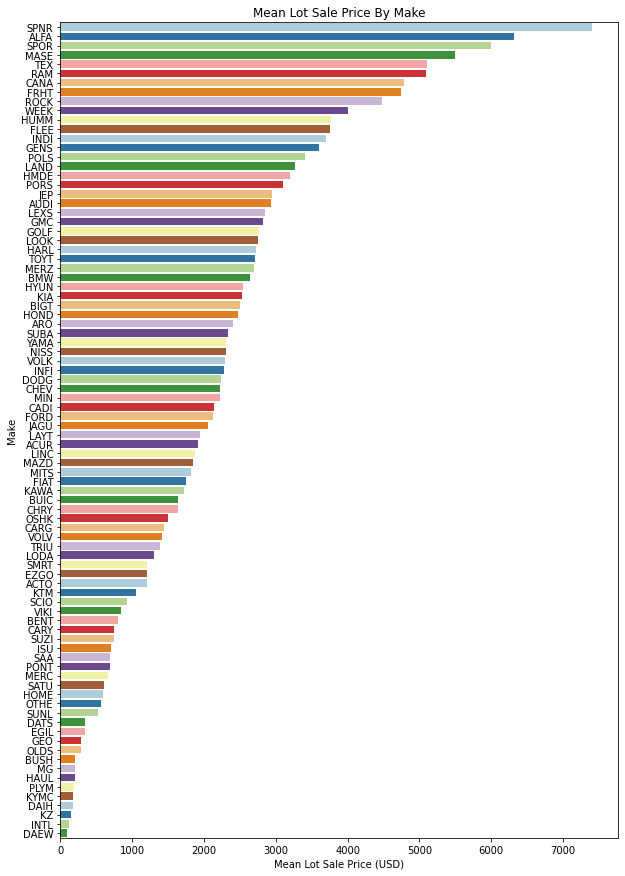

In [52]:
# Bar Chart - Mean Lot Sale Price By Make
grouped_data = df_typev.groupby('Make')['Sale Price'].mean()
grouped_data = grouped_data.sort_values(ascending=False)

plt.figure(figsize=(10, 15))
sns.barplot(x=grouped_data.values, y=grouped_data.index, palette='Paired')
plt.ylabel('Make')
plt.xlabel('Mean Lot Sale Price (USD)')
plt.title('Mean Lot Sale Price By Make')
plt.show()

## 3.8 Lot Count for Primary Damage Type VS Lot Year Category

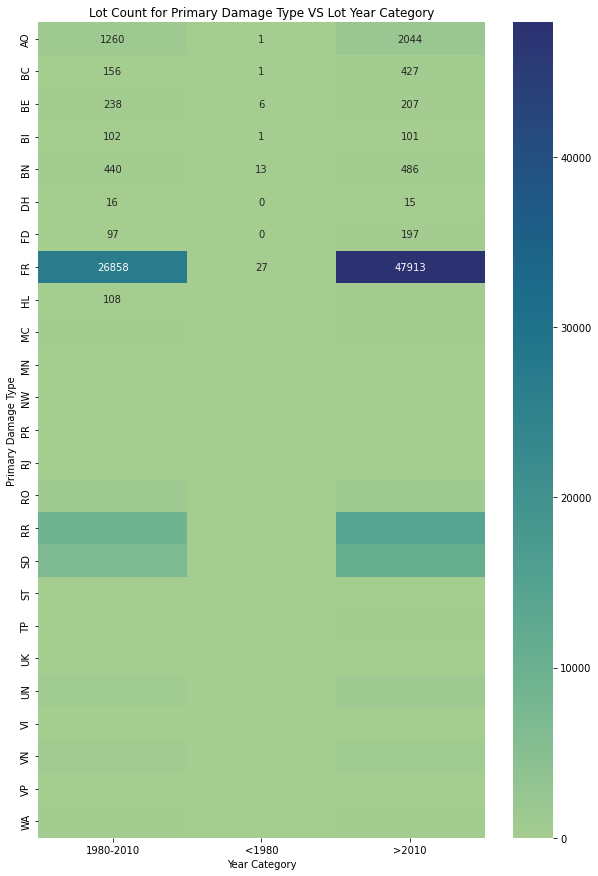

In [53]:
# Group by both categorical variables and count occurrences
grouped_data = df_typev.groupby(['Year Category', 'Primary Damage Type']).size().reset_index(name='Count')

# Pivot the data for heatmap creation
pivoted_data = grouped_data.pivot(index='Primary Damage Type', columns='Year Category', values='Count').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(pivoted_data, annot=True, cmap='crest', cbar=True, fmt='g')
plt.title('Lot Count for Primary Damage Type VS Lot Year Category')
plt.ylabel('Primary Damage Type')
plt.xlabel('Year Category')
plt.show()

# 4. Data Analysis

## 4.1 Regression Analysis of Sales Price

Following are some of the interpretations of the below regression result:
1. When the lot's pre-accident value or ACV increases by 1000 USD, the lot sale price increases by USD 277.
2. When the lot's repair estimate increases by USD 1000, the lot sale price decreases by USD 17.
3. When the number of days taken to auction a lot increases by 100 days, the lot sale price increases by USD 45. This could be connected to chances of getting a better deal over an extended period of time.
4. When the number of days to assignment from the insurance company to Copart increases by 100 days, the lot sale price increases by USD 552.
5. Compared to the make APRI (aka Aprilia), if the lot make is SPNR, the lot sale price is USD 4550 higher.
6. Compared to the make APRI (aka Aprilia), if the lot make is INTL, the lot sale price is USD 3600 lower.
7. Compared to the primary damage type AO (or All Over), if the primary damage type is VP (or replaced VIN), the lot sale price is USD 3908 lower.
8. Compared to the primary damage type AO (or All Over), if the primary damage type is VI (or missing/altered VIN), the lot sale price is USD 3729 higher.
9. Compared to title Group C (Clean), if the lot title Group is J (or junk), the lot sale price is USD 459 lower.
10. Compared to the lot year between 1980 and 2010, if the lot year is after 2010, the lot sale price is USD 20 higher. 

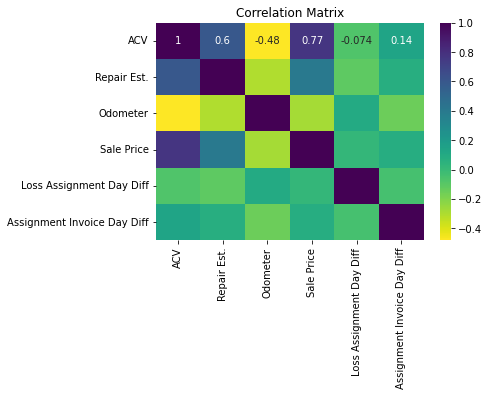

In [54]:
# correlation matrix
df_regv = df_typev.copy()
correlation_matrix = df_regv.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')
plt.title('Correlation Matrix')
plt.show()

In [55]:
# drop unnecessary columns
df_regv = df_regv.drop(columns=['Lot Number','Assignment Date','Loss Date','Invoice Date','Vehicle Type',
                          'Lot Year','Group Model','Lot Model','Secondary Damage Type'])

In [56]:
# create dummies
typev_dum = pd.get_dummies(df_regv, columns=['Yard Zip Code','Make','Primary Damage Type',
                                              'Severity of Damage','Run Condition','Title Group',
                                              'Odometer Brand','Has Keys','Year Category'], drop_first=True)

In [57]:
# statistical linear regression
import statsmodels.api as sm
X = typev_dum.drop(columns=['Sale Price'])
y = typev_dum['Sale Price']

X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2142.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        12:55:20   Log-Likelihood:            -1.0825e+06
No. Observations:              129457   AIC:                         2.165e+06
Df Residuals:                  129322   BIC:                         2.167e+06
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [58]:
# Keep statistically significant make and categorize rest as others
specific_makes = ['APRI', 'BENT', 'COLE', 'EGIL', 'EZGO', 'GEO', 'INTL', 'KZ', 'MG', 'SAA', 'SPNR', 'TEX']

def categorize_make(make):
    if make in specific_makes:
        return make
    else:
        return 'OTHER'

df_regv['Make Category'] = df_regv['Make'].apply(categorize_make).astype(object)
df_regv = df_regv.drop(columns=['Make'])

In [59]:
# Categorize insignificant damages as OTHER
insignificant_damages = ['BE', 'DH', 'FD', 'PR', 'RJ', 'RO', 'ST', 'UK']

# Categorize primary damages
def categorize_damage(damage):
    if damage not in insignificant_damages:
        return damage
    else:
        return 'OTHER'

df_regv['Primary Damage Type Category'] = df_regv['Primary Damage Type'].apply(categorize_damage)
df_regv = df_regv.drop(columns=['Primary Damage Type'])

In [60]:
typev_dum = pd.get_dummies(df_regv, columns=['Yard Zip Code','Make Category','Primary Damage Type Category',
                                              'Severity of Damage','Run Condition','Title Group',
                                              'Odometer Brand','Has Keys','Year Category'], drop_first=True)

In [61]:
# drop insignificant variables discovered in previous regression result
typev_dum = typev_dum.drop(columns=['Title Group_S','Has Keys_E','Has Keys_N','Has Keys_Y','Year Category_<1980'])

In [62]:
# check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(typev_dum)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for each feature:")
print(vif_data)

VIF values for each feature:
                               feature            VIF
0                                const  134078.171768
1                                  ACV       4.416978
2                          Repair Est.       1.651230
3                             Odometer       1.835729
4                           Sale Price       3.074687
5             Loss Assignment Day Diff       1.063791
6          Assignment Invoice Day Diff       1.056473
7                  Yard Zip Code_85706       1.226938
8                  Yard Zip Code_87105       1.229273
9                   Make Category_EGIL       3.000260
10                  Make Category_EZGO       3.000621
11                   Make Category_GEO      21.001007
12                  Make Category_INTL       2.000364
13                    Make Category_KZ       2.002167
14                    Make Category_MG       2.001319
15                 Make Category_OTHER      86.958495
16                   Make Category_SAA      57.984733

In [63]:
# drop variables with VIF>10
typev_dum = typev_dum.drop(columns=['Make Category_GEO','Make Category_OTHER','Odometer Brand_E',
                                   'Odometer Brand_N','Odometer Brand_X','Primary Damage Type Category_FR'])

In [64]:
# run regression again
X = typev_dum.drop(columns=['Sale Price'])
y = typev_dum['Sale Price']

X = sm.add_constant(X)

model = sm.OLS(y, X.astype(float))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     6853.
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        12:55:46   Log-Likelihood:            -1.0857e+06
No. Observations:              129457   AIC:                         2.171e+06
Df Residuals:                  129417   BIC:                         2.172e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## 4.2 Analysis of Days Taken to Auction the Lot

### 4.2.1 Analysis of Days Taken to Auction the Lot By Vehicle Type (Dataset With All Vehicle Types)

V Type vehicle is the only type that gets auctioned within 60 days on average. M (Motorboat) and U (Light Truck) vehicle type take the longest - 130 days on average.

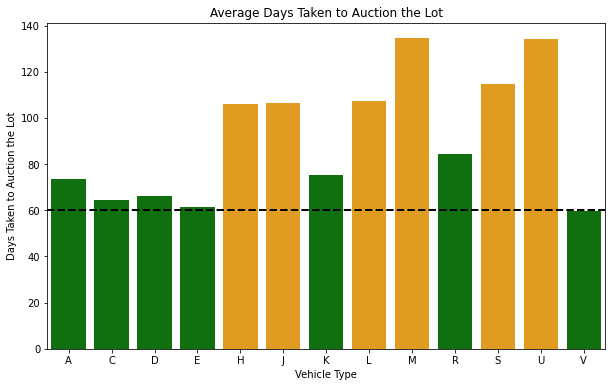

In [65]:
# Bar Chart - Average Days Taken to Auction the Lot
grouped_data = df.groupby('Vehicle Type')['Assignment Invoice Day Diff'].mean()

plt.figure(figsize=(10, 6))
colors = ['green' if val <= grouped_data.mean() else 'orange' for val in grouped_data.values]
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=colors)
plt.xlabel('Vehicle Type')
plt.ylabel('Days Taken to Auction the Lot')
plt.title('Average Days Taken to Auction the Lot')
plt.axhline(y=df['Assignment Invoice Day Diff'].mean(), color='black', linewidth=2, linestyle='--')
plt.show()

Lot make KIA, DODGE, CHEVROLET, JEEP, and HYUNDAI are the slowest to auction. They take a week more than the median of 43 days. We can use this information to creatively place the lots in the company yard based on when they'll be auctioned, improving operational efficiency of the yard.

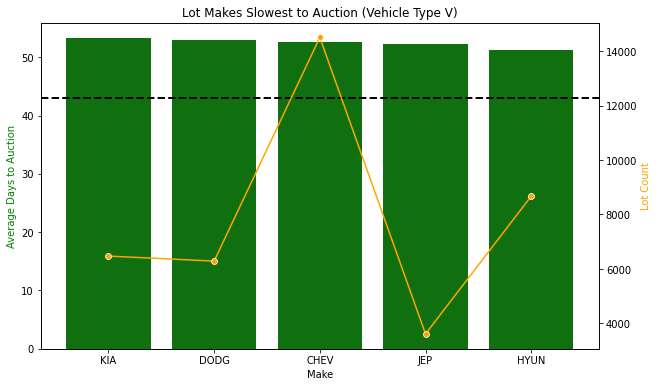

In [66]:
# Dual Axis Bar Chart - Lot Makes Slowest to Auction (Vehicle Type V)
result = df_typev.groupby('Make').agg({'Assignment Invoice Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
# only include lots with significant volume
result = result[result['Total Count']>1000]
result = result.sort_values(by='Average Days', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days to Auction', color='green')
ax1.set_xlabel('Make')
plt.axhline(y=df_typev['Assignment Invoice Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Lot Makes Slowest to Auction (Vehicle Type V)')
plt.show()

Lot make TOYOTA, PONTIAC, SATURN, SUZUKI, and MERCEDES are the quickest to auction. They take 43 days or less. We can use this information to creatively place the lots in the company yard based on when they'll be auctioned, improving operational efficiency of the yard.

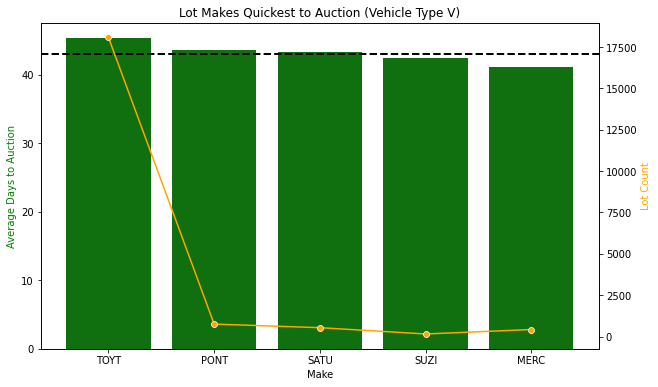

In [67]:
# Dual Axis Bar Chart - Lot Makes Quickest to Auction (Vehicle Type V)
result = df_typev.groupby('Make').agg({'Assignment Invoice Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
# only include lots with significant volume
result = result[result['Total Count']>100]
result = result.sort_values(by='Average Days', ascending=False).tail(5)

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days to Auction', color='green')
ax1.set_xlabel('Make')
plt.axhline(y=df_typev['Assignment Invoice Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Lot Makes Quickest to Auction (Vehicle Type V)')
plt.show()

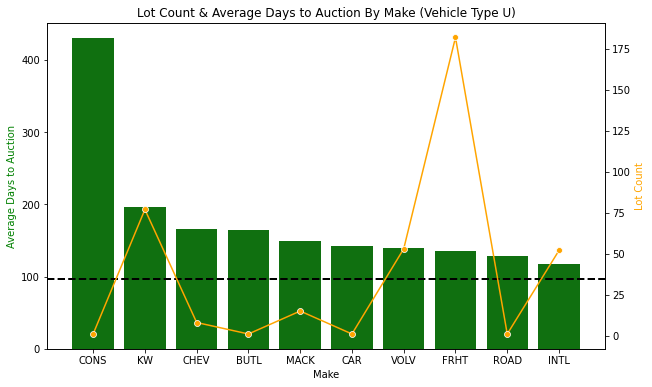

In [68]:
# Dual Axis Bar Chart - Lot Count & Average Days to Auction By Make (Vehicle Type U - Light Truck)
result = df[df['Vehicle Type']=='U'].groupby('Make').agg({'Assignment Invoice Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
result = result.sort_values(by='Average Days', ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days to Auction', color='green')
ax1.set_xlabel('Make')
plt.axhline(y=df.loc[df['Vehicle Type']=='U','Assignment Invoice Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Lot Count & Average Days to Auction By Make (Vehicle Type U)')
plt.show()

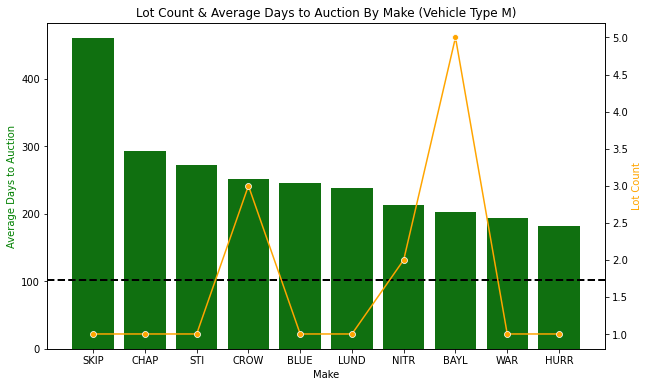

In [69]:
# Dual Axis Bar Chart - Lot Count & Average Days to Auction By Make (Vehicle Type M - Motorboat)
result = df[df['Vehicle Type']=='M'].groupby('Make').agg({'Assignment Invoice Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
result = result.sort_values(by='Average Days', ascending=False).head(10)


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days to Auction', color='green')
ax1.set_xlabel('Make')
plt.axhline(y=df.loc[df['Vehicle Type']=='M','Assignment Invoice Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Lot Count & Average Days to Auction By Make (Vehicle Type M)')
plt.show()

### 4.2.3 Analysis of Average Days Taken to Auction the Lot By Primary Damage Type

On average, lots with VP (replaced VIN) primary damage take the least amount of days to auction. The number of days is less than 15 days.

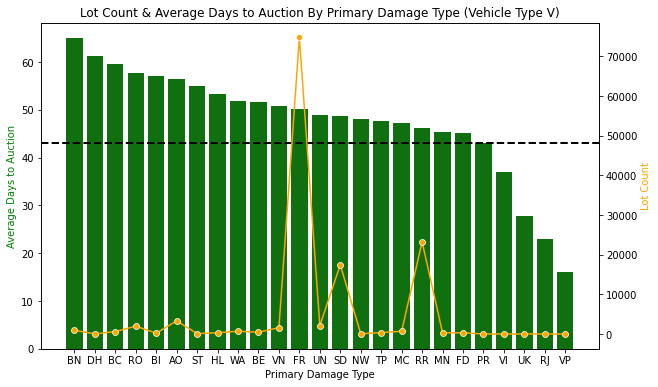

In [70]:
# Dual Axis Bar Chart - Lot Count & Average Days to Auction By Primary Damage Type (Vehicle Type V)
result = df_typev.groupby('Primary Damage Type').agg({'Assignment Invoice Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
result = result.sort_values(by='Average Days', ascending=False)


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days to Auction', color='green')
ax1.set_xlabel('Primary Damage Type')
plt.axhline(y=df_typev['Assignment Invoice Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Lot Count & Average Days to Auction By Primary Damage Type (Vehicle Type V)')
plt.show()

## 4.3 Analysis of Days Taken for the Lot to be Assigned

### 4.3.1 Analysis of Days Taken for the Lot to be Assigned By Vehicle Type (Dataset With All Vehicle Types)

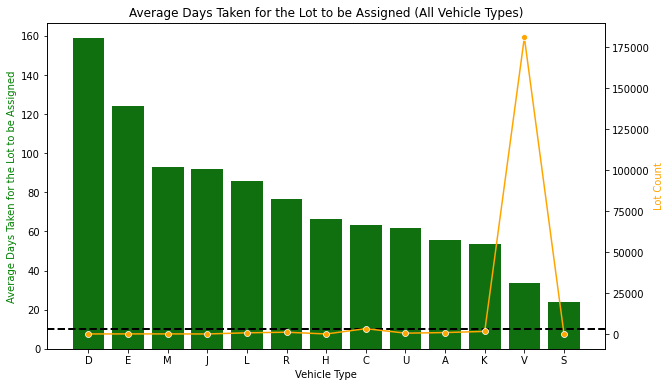

In [71]:
# Dual Axis Bar Chart - Lot Count & Average Days Taken for the Lot to be Assigned (All Vehicle Types)
result = df.groupby('Vehicle Type').agg({'Loss Assignment Day Diff': 'mean', 'Lot Number': 'count'})
result.columns = ['Average Days', 'Total Count']
result = result.sort_values(by='Average Days', ascending=False)


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days Taken for the Lot to be Assigned', color='green')
ax1.set_xlabel('Vehicle Type')
plt.axhline(y=df['Loss Assignment Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Total Count'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Lot Count', color='orange')

plt.title('Average Days Taken for the Lot to be Assigned (All Vehicle Types)')
plt.show()

### 4.3.2 Analysis of Days Taken for the Lot to be Assigned By Make

Lot make like GMC, MERCEDES, and BMW take the longest to be assigned to the company. But they also go for high prices in auction. The company can work with insurance companies to expediate the asssignment of these specific lots.

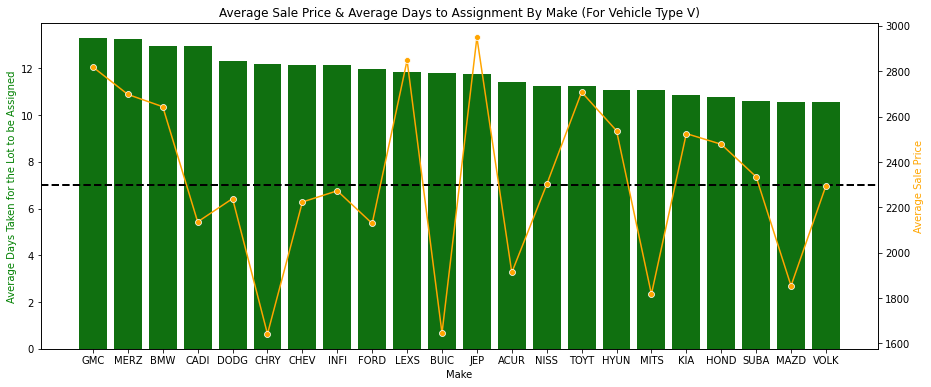

In [72]:
# Dual Axis Bar Chart - Average Sale Price & Average Days to Assignment By Make (For Vehicle Type V)
result = df_typev.groupby('Make').agg({'Loss Assignment Day Diff': 'mean', 'Lot Number': 'count', 'Sale Price': 'mean'})
result.columns = ['Average Days', 'Total Count', 'Average Price']
# only include lots with significant volume
result = result[result['Total Count']>1000]
result = result.sort_values(by='Average Days', ascending=False)

fig, ax1 = plt.subplots(figsize=(15, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days Taken for the Lot to be Assigned', color='green')
ax1.set_xlabel('Make')
plt.axhline(y=df_typev['Loss Assignment Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Average Price'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Average Sale Price', color='orange')

plt.title('Average Sale Price & Average Days to Assignment By Make (For Vehicle Type V)')
plt.show()

### 4.3.3 Analysis of Days Taken for the Lot to be Assigned By Primary Damage Type

Lot with primary damage vandalism takes the longest to be assigned to the company. These lots also fetch a high price in auctions. The company can work with insurance companies to expediate the asssignment of these specific lots.

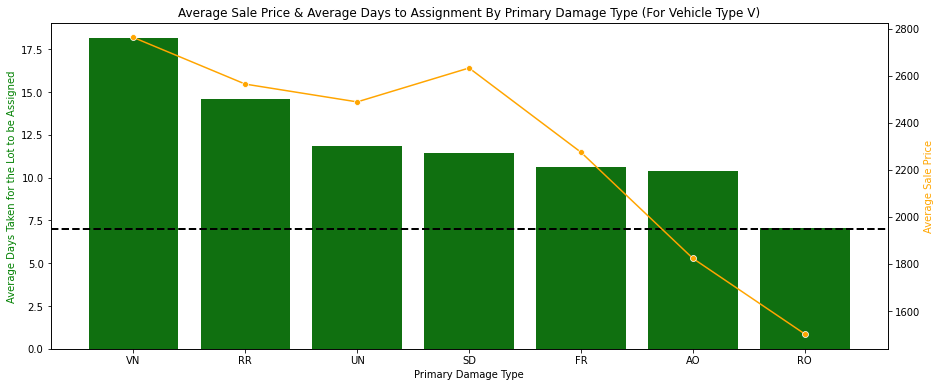

In [77]:
# Dual Axis Bar Chart - Average Sale Price & Average Days to Assignment By Make (For Vehicle Type V)
result = df_typev.groupby('Primary Damage Type').agg({'Loss Assignment Day Diff': 'mean', 'Lot Number': 'count', 'Sale Price': 'mean'})
result.columns = ['Average Days', 'Total Count', 'Average Price']
# only include lots with significant volume
result = result[result['Total Count']>1000]
result = result.sort_values(by='Average Days', ascending=False)

fig, ax1 = plt.subplots(figsize=(15, 6))
sns.barplot(x=result.index, y=result['Average Days'], ax=ax1, color='green')
ax1.set_ylabel('Average Days Taken for the Lot to be Assigned', color='green')
ax1.set_xlabel('Primary Damage Type')
plt.axhline(y=df_typev['Loss Assignment Day Diff'].median(), color='black', linewidth=2, linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(x=result.index, y=result['Average Price'], ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Average Sale Price', color='orange')

plt.title('Average Sale Price & Average Days to Assignment By Primary Damage Type (For Vehicle Type V)')
plt.show()

## 4.4 Time Trend Analysis (All Vehicle Types)

### 4.4.1 Difference in Outgoing and Incoming Lots By Yard Zip Codes

April is the only month where there is a outgoing surplus across all zip codes. In other words, there are way more lots being auctioned compared to lots being assigned in April. Yard with zip code 87105 has an outgoing deficit for 7 out of 12 months. The worst among the three yards.

In [74]:
df_mon_year = df.copy()
df_mon_year['mon_asd'] = df['Assignment Date'].dt.strftime('%b')
df_mon_year['mon_id'] = df['Invoice Date'].dt.strftime('%b')
df_mon_year_z1 = df_mon_year[df_mon_year['Yard Zip Code']==87105]
df_mon_year_z2 = df_mon_year[df_mon_year['Yard Zip Code']==85043]
df_mon_year_z3 = df_mon_year[df_mon_year['Yard Zip Code']==85706]

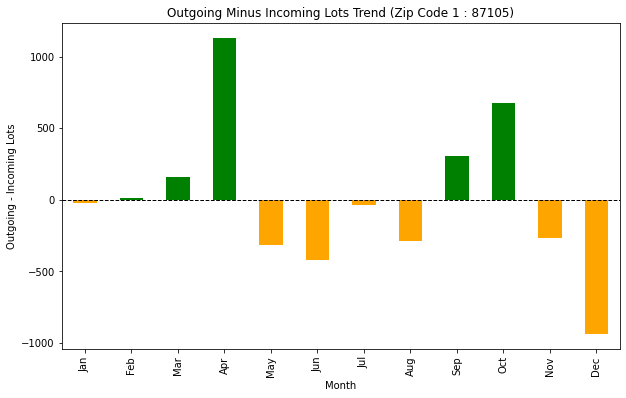

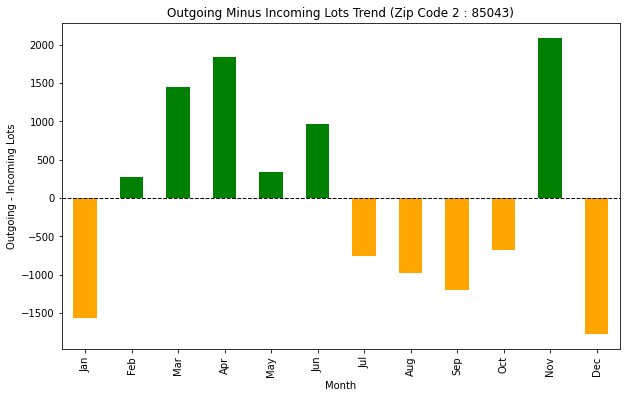

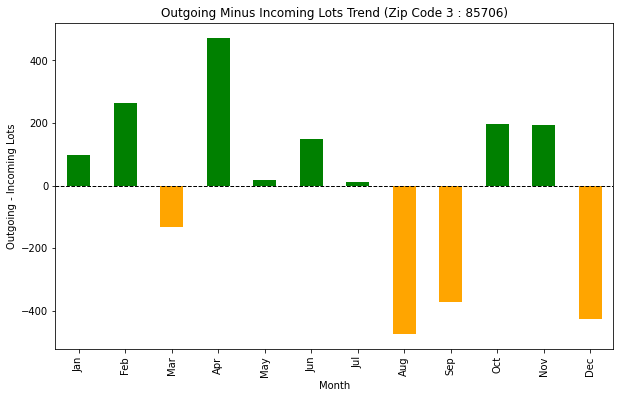

In [75]:
# Yard Zip Code 1 : 87105
# difference in outgoing and incoming lots by month
month_diff_count = df_mon_year_z1['mon_id'].value_counts() - df_mon_year_z1['mon_asd'].value_counts()

desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_diff_count = month_diff_count.reindex(desired_order)

colors = ['green' if val >= 0 else 'orange' for val in month_diff_count.values]

plt.figure(figsize=(10, 6))
month_diff_count.plot(kind='bar', stacked=False, color=colors)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.title('Outgoing Minus Incoming Lots Trend (Zip Code 1 : 87105)')
plt.xlabel('Month')
plt.ylabel('Outgoing - Incoming Lots')

# Yard Zip Code 2 : 85043
# difference in outgoing and incoming lots by month
month_diff_count = df_mon_year_z2['mon_id'].value_counts() - df_mon_year_z2['mon_asd'].value_counts()

desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_diff_count = month_diff_count.reindex(desired_order)

colors = ['green' if val >= 0 else 'orange' for val in month_diff_count.values]

plt.figure(figsize=(10, 6))
month_diff_count.plot(kind='bar', stacked=False, color=colors)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.title('Outgoing Minus Incoming Lots Trend (Zip Code 2 : 85043)')
plt.xlabel('Month')
plt.ylabel('Outgoing - Incoming Lots')

# Yard Zip Code 3 : 85706
# difference in outgoing and incoming lots by month
month_diff_count = df_mon_year_z3['mon_id'].value_counts() - df_mon_year_z3['mon_asd'].value_counts()

desired_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_diff_count = month_diff_count.reindex(desired_order)

colors = ['green' if val >= 0 else 'orange' for val in month_diff_count.values]

plt.figure(figsize=(10, 6))
month_diff_count.plot(kind='bar', stacked=False, color=colors)
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.title('Outgoing Minus Incoming Lots Trend (Zip Code 3 : 85706)')
plt.xlabel('Month')
plt.ylabel('Outgoing - Incoming Lots')
plt.show()

Yard with zip code 85043 auctioned 65% of the total number of lots. This indicates that the yard is the largest among the three mentioned in the dataset.

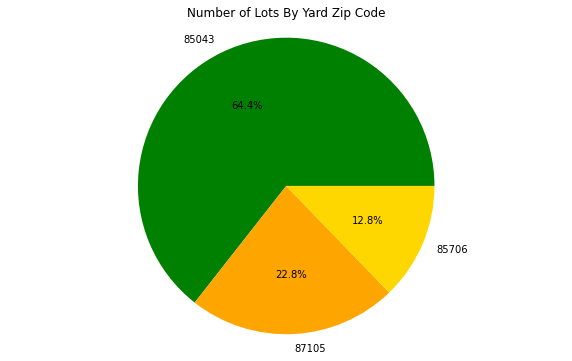

In [76]:
# Pie Chart Number of Lots Processed By Each Yard Zip Code
lot_count = df_mon_year['Yard Zip Code'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(lot_count.values, labels=lot_count.index, autopct='%1.1f%%', colors=['green','orange','gold'])

plt.title('Number of Lots By Yard Zip Code')
plt.axis('equal')
plt.show()

# 5. Conclusion

## 5.1 Final Observations and Conclusion

1. Loot of make like GMC, MERCEDES, and BMW take the longest to be assigned to the company. But they also go for high prices in auction. The company can work with insurance companies to expediate the asssignment of these specific lots. Same goes for vandalised lots as well.

2. As the difference between the lot assignment date and the lot invoice date increases, the auction price of the lot increases. This could imply that a longer time between assignment and invoicing may be associated with higher prices. The reasons for this relationship could be multifaceted: Market Timing, Time for Vehicle Prep, and Better Quality Checks.
 - Understanding which lots take longer to auction can help to manage salvage yards better. For example, lot make like KIA, DODGE, CHEVROLET, JEEP, and HYUNDAI are the slowest to auction. Whereas lot make TOYOTA, PONTIAC, SATURN, SUZUKI, and MERCEDES are the quickest to auction.
 
3. Yards have an effect on the lot sale price (max <- min): 
                Yard (zip-85043) > Yard (zip-87105) > Yard (zip-85706)
The reasons for this difference could be: Local Marker Conditions (Vehicle Distribution) and Yard Specific Practices.

4. Lots make plays a vital role in determining its auction price. Certain makes, such as COLE, SPNR, and TEX, are associated with higher auction prices, while other makes, such as INTL, KZ, and MG, are associated with lower auction prices. These differences could be due to a variety of factors: Brand Reputation, Vehicle quality, and Demand for specific makes. 

 - Understanding these relationships can help make more informed decisions regarding vehicle valuation and auction strategies.

5. Serious primary damages such as VP (replaced VIN) and VI (missing/altered VIN) take the longest time (40 days) to get assigned to the company from the insurance companies. After being assigned, it takes around 40 days for the lot to get auctioned, which is almost the same as for other lot damages.


## 5.2 Suggestions

1. Given the positive relationship between the time from assignment to invoicing and auction price, increasing this time frame could result in higher auction prices. Optimize the processing and preparation time by enhancing vehicle inspections, repairs, and quality control checks. This can improve the overall condition of the vehicles and thus command higher auction prices. Analyze historical data to identify optimal time frames for processing vehicles and adjust operational practices accordingly.
2. Invest in or improve operations at yards with fewer lots auctioned (such as those in zip codes 87105 and 85706) to leverage untapped potential and boost overall sales.
3. Focus on promoting high-performing makes (COLE, SPNR, TEX) in marketing and sales strategies to attract buyers and increase the auction prices of these vehicles.
4. Consider special handling procedures for vehicles with vandalism damage types to expedite the assignment and auction processes, ensuring they are not delayed unnecessarily.
5. Continuously monitor and analyze market trends, buyer preferences, and pricing strategies in different regions and for different makes and damage types. Use this data to refine auction strategies and set competitive prices that reflect current market dynamics.

## 5.3 Next Steps
1. Buyer Demographic Data
2. Competitor Data
3. Time Data
4. Tune existing model
5. Time Zone Analysis